# Baseline results

This notebook generates the plots for the baseline (`ef_construction=ef_search=128, m={8,16}`). The data is obtained by running the modified [ANN-Benchmarks](https://github.com/binidxaba/ann-benchmarks).

The relevant csv files are:
- create.csv: The result of grepping the index build start/end tags and convert to unix timestamps
- results.csv: The file generated by the benchmark after executing the data_export.py script

In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re

## Data directory

You can find the data files in the following directory in the repository. 

In [ ]:
directory = "csv_sift_128_euclidean_parallel_full_baseline_1702561796"

In [4]:
colors = ["#412e93", "#f9457a", "#da38ca"]
ef_construction = 128
ef_search = 128

## Build Time

I parsed the ann-benchmarks output looking for the Index Build start/end tags, then converted those to Unix timestamps.

In [ ]:
build_time = pd.read_csv(directory + "/create.csv")
build_time = build_time.rename(columns={'extension': 'Extension'})
build_time['build_time'] = build_time["end"]-build_time["start"]
build_time

In [6]:
pv = build_time.pivot(index="m", columns="Extension", values="build_time")

Text(0.5, 1.0, 'Build Time (ef_construction=128)')

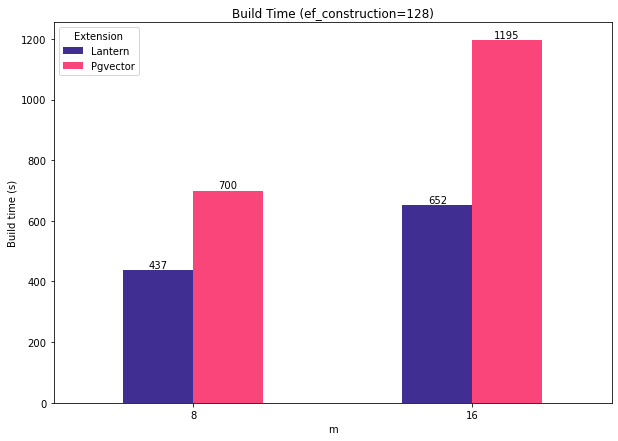

In [7]:
ax = pv.plot.bar(color=colors, figsize=(10,7), rot=0)
ax.set_ylabel("Build time (s)")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set_title(f"Build Time (ef_construction={ef_construction})")

In [8]:
pv["speed_up"] = 1 + (pv["Pgvector"] - pv["Lantern"]) / pv["Lantern"]
pv

Extension,Lantern,Pgvector,speed_up
m,,,
8,437,700,1.601831
16,652,1195,1.832822


## Massaging the results.csv file

I basically had to parse the `parameters` column to extract the construction/search parameters. With that, I could easily pivot the data frame for the different plots.

In [9]:
df_all_results = pd.read_csv(directory + "/results.csv")
df_all_results = df_all_results.rename(columns={'algorithm': 'Extension'})
df_all_results

,Extension,parameters,count,k-nn,epsilon,largeepsilon,rel,qps,p50,p95,p99,p999,distcomps,build,candidates,indexsize,queriessize,dataset
0,lantern,"Lantern(m=16, ef_construction=128, ef_search=128)",10,0.98857,0.99912,1.00000,0.089383,202.682893,4.952806,4.952806,4.952806,4.952806,0.0,823.780856,10.0,702840.0,3467.682888,sift-128-euclidean
1,lantern,"Lantern(m=8, ef_construction=128, ef_search=128)",10,0.95120,0.99010,0.99971,0.089515,318.788949,3.196955,3.196955,3.196955,3.196955,0.0,607.895091,10.0,620704.0,1947.068750,sift-128-euclidean
2,pgvector,"PGVector(m=16, ef_construction=128, ef_search=...",10,0.99328,0.99956,1.00000,0.089370,348.781174,2.942147,2.942147,2.942147,2.942147,0.0,1238.235469,10.0,800824.0,2296.064295,sift-128-euclidean
3,pgvector,"PGVector(m=8, ef_construction=128, ef_search=128)",10,0.96815,0.99487,1.00000,0.089449,577.517213,1.779598,1.779598,1.779598,1.779598,0.0,743.792630,10.0,716720.0,1241.036603,sift-128-euclidean


In [10]:
c = re.compile(".*m=(\d+)")
df_all_results['m'] =  [int(c.match(x).group(1)) for x in df_all_results['parameters']]

c = re.compile(".*ef_search=(\d+)")
df_all_results['ef_search'] =  [int(c.match(x).group(1)) for x in df_all_results['parameters']]

c = re.compile(".*ef_construction=(\d+)")
df_all_results['ef_construction'] =  [int(c.match(x).group(1)) for x in df_all_results['parameters']]

df_all_results.head()

,Extension,parameters,count,k-nn,epsilon,largeepsilon,rel,qps,p50,p95,...,p999,distcomps,build,candidates,indexsize,queriessize,dataset,m,ef_search,ef_construction
0,lantern,"Lantern(m=16, ef_construction=128, ef_search=128)",10,0.98857,0.99912,1.00000,0.089383,202.682893,4.952806,4.952806,...,4.952806,0.0,823.780856,10.0,702840.0,3467.682888,sift-128-euclidean,16,128,128
1,lantern,"Lantern(m=8, ef_construction=128, ef_search=128)",10,0.95120,0.99010,0.99971,0.089515,318.788949,3.196955,3.196955,...,3.196955,0.0,607.895091,10.0,620704.0,1947.068750,sift-128-euclidean,8,128,128
2,pgvector,"PGVector(m=16, ef_construction=128, ef_search=...",10,0.99328,0.99956,1.00000,0.089370,348.781174,2.942147,2.942147,...,2.942147,0.0,1238.235469,10.0,800824.0,2296.064295,sift-128-euclidean,16,128,128
3,pgvector,"PGVector(m=8, ef_construction=128, ef_search=128)",10,0.96815,0.99487,1.00000,0.089449,577.517213,1.779598,1.779598,...,1.779598,0.0,743.792630,10.0,716720.0,1241.036603,sift-128-euclidean,8,128,128


## Index Size

In [11]:
results_piv = df_all_results[df_all_results["ef_search"]==128].pivot(index="m", columns="Extension", values="indexsize")
results_piv = results_piv.rename(columns={'lantern': 'Lantern', 'pgvector':'Pgvector'})

results_piv

Extension,Lantern,Pgvector
m,,
8,620704.0,716720.0
16,702840.0,800824.0


Text(0.5, 1.0, 'Index Size (ef_construction=128)')

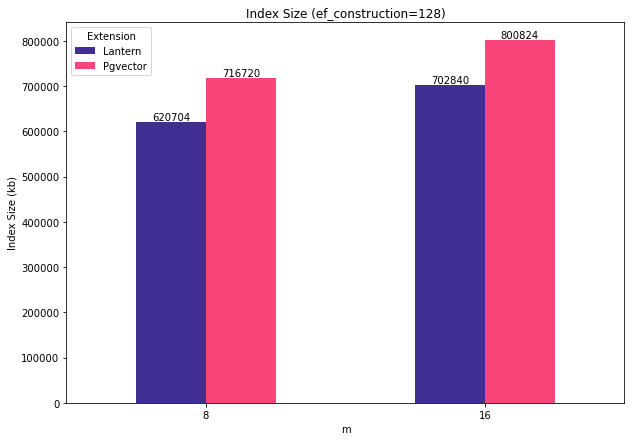

In [12]:
ax = results_piv.plot.bar(color=colors, figsize=(10,7), rot=0)
ax.set_ylabel("Index Size (kb)")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set_title(f"Index Size (ef_construction={ef_construction})")

In [13]:
results_piv["speed_up"] = (results_piv["Pgvector"] - results_piv["Lantern"])/results_piv["Lantern"]
results_piv

Extension,Lantern,Pgvector,speed_up
m,,,
8,620704.0,716720.0,0.154689
16,702840.0,800824.0,0.139412


## Recall

In [15]:
results_piv = df_all_results[df_all_results["ef_search"]==128].pivot(index="m", columns="Extension", values="k-nn")
results_piv = results_piv.rename(columns={'lantern': 'Lantern', 'pgvector':'Pgvector'})

results_piv

Extension,Lantern,Pgvector
m,,
8,0.95120,0.96815
16,0.98857,0.99328


Text(0.5, 1.0, 'Recall (ef_construction=128, ef_search=128)')

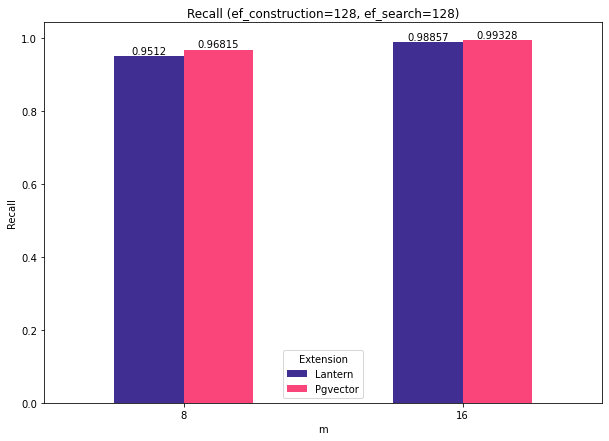

In [16]:
ax = results_piv.plot.bar(y = ["Lantern", "Pgvector"], color=colors, figsize=(10,7), rot=0)
ax.set_ylabel("Recall")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set_title(f"Recall (ef_construction={ef_construction}, ef_search={ef_search})")

## Throughput

In [17]:
results_piv = df_all_results[df_all_results["ef_search"]==128].pivot(index="m", columns="Extension", values="qps")
results_piv = results_piv.rename(columns={'lantern': 'Lantern', 'pgvector':'Pgvector'})

results_piv

Extension,Lantern,Pgvector
m,,
8,318.788949,577.517213
16,202.682893,348.781174


Text(0.5, 1.0, 'QPS (ef_construction=128, ef_search=128))')

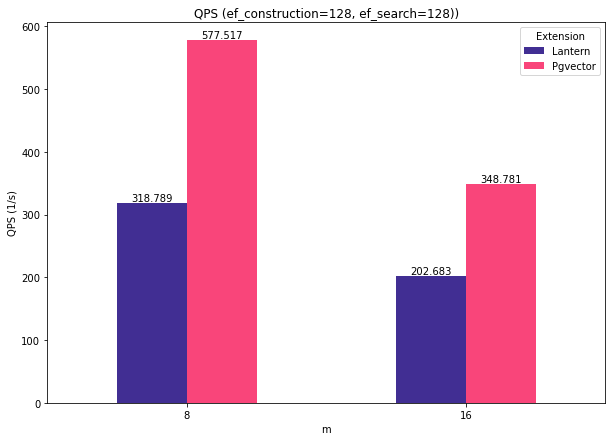

In [18]:
ax = results_piv.plot.bar(y = ["Lantern", "Pgvector"], color=colors, figsize=(10,7), rot=0)
ax.set_ylabel("QPS (1/s)")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set_title(f"QPS (ef_construction={ef_construction}, ef_search={ef_search}))")